In [6]:
import cv2
import pandas as pd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

import torch
from torchvision import transforms
from torchmetrics.classification import JaccardIndex, MulticlassAccuracy
from torchmetrics.classification import MulticlassConfusionMatrix
from segmentation_models_pytorch.encoders import get_preprocessing_fn
import torch.nn.functional as F
from empatches import BatchPatching

import os
from imutils import paths
from files import config

file_path = os.getcwd()
iMPaths = np.array(sorted(list(paths.list_images(os.path.join(file_path,config.train_image)))))

means = []
stds = []
gains = []
for i in iMPaths:
    image = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    means.append(np.mean(image))
    stds.append(np.std(image))
    gains.append(np.mean(image)/np.var(image))


def calculate_mean_gain_exp(dataset, training_mean, training_std):
    total_gain = 0
    total_exp = 0
    
    # Assuming dataset is a list of images
    for img in dataset:
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        mean_img = np.mean(img)
        std_img = np.std(img)
        
        # Assuming training_mean and training_std are predefined
        gain_factor = training_mean / mean_img
        exp_factor = training_std / std_img
        
        total_gain += gain_factor
        total_exp += exp_factor
    
    # Calculate mean gain and exp
    mean_gain = total_gain / len(dataset)
    mean_exp = total_exp / len(dataset)
    
    return mean_gain, mean_exp

237.62632615384615 29.805059692307694 93.96796478351422 8.83290426631574
132.16870970854248 48.40875886903693 0.0767172917867908
237.62632615384615 26.181998299091376
1.1135738581847063 1.105646659783418


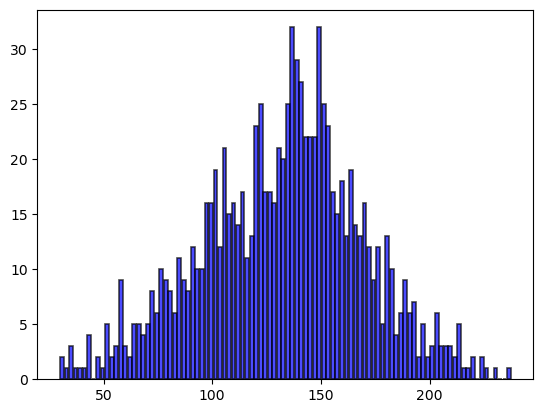

In [7]:
print(max(means), min(means), max(stds), min(stds))
mean, std, gain = sum(means)/len(means), sum(stds)/len(stds), sum(gains)/len(gains)
print(mean, std, gain)
print(means[np.argmax(means)], stds[np.argmax(means)])

sorted_means = sorted(means)
sorted_std = sorted(stds)
sorted_gain = sorted(gains)

plt.hist(sorted_means, bins=100, color='b', alpha=0.7, rwidth=0.85, label='mean', edgecolor='black', linewidth=1.2)

mean_gain, mean_exp = calculate_mean_gain_exp(iMPaths, mean, std)
print(mean_gain, mean_exp)

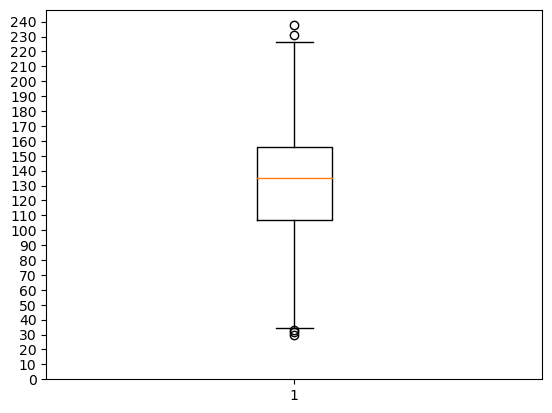

<Figure size 1000x700 with 0 Axes>

In [37]:
plt.boxplot(sorted_means)
plt.yticks(np.arange(0, 250, 10))
plt.figure(figsize =(10, 7), dpi=100)
plt.show()

In [40]:
# finding the 1st quartile
q1 = np.quantile(sorted_means, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(sorted_means, 0.75)
med = np.median(sorted_means)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

49.20697538461539 229.66515600000002 32.83725446153845


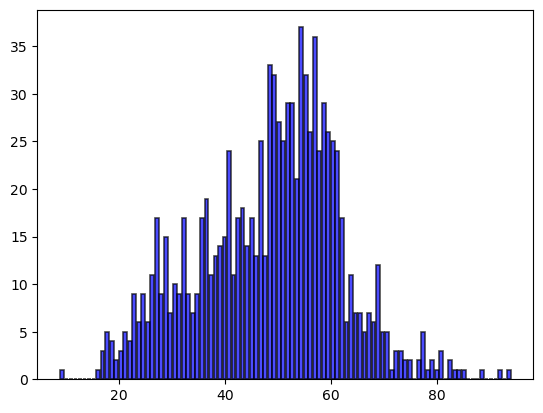

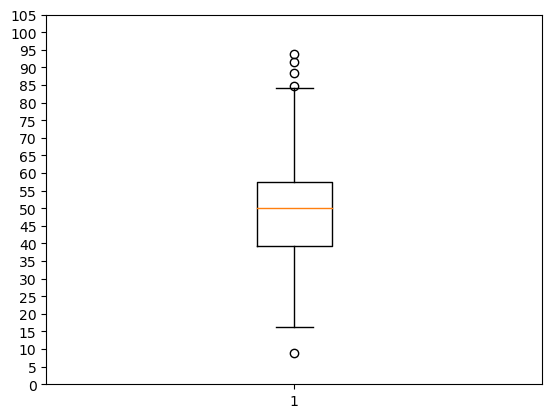

<Figure size 1000x700 with 0 Axes>

In [47]:
plt.hist(sorted_std, bins=100, color='b', alpha=0.7, rwidth=0.85, label='mean', edgecolor='black', linewidth=1.2)
plt.show()
plt.boxplot(sorted_std)
plt.yticks(np.arange(0, 110, 5))
plt.figure(figsize =(10, 7), dpi=100)
plt.show()

In [9]:
# finding the 1st quartile
q1 = np.quantile(sorted_std, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(sorted_std, 0.75)
med = np.median(sorted_std)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

18.205925381155843 84.70742325908594 11.883721734462572


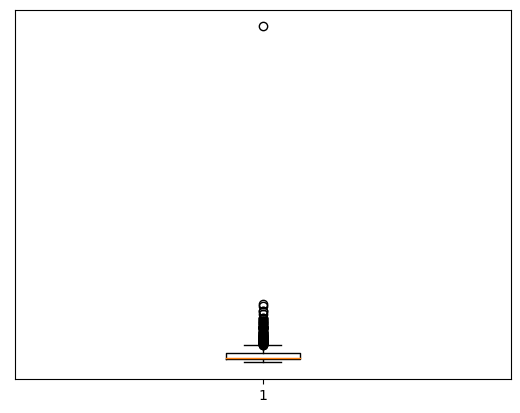

<Figure size 1000x700 with 0 Axes>

0.04500101426380865 0.1506290648598907 -0.029374992195343896


In [17]:
plt.boxplot(sorted_gain)
plt.yticks(np.arange(-5, 5, 10))
plt.figure(figsize =(10, 7), dpi=100)
plt.show()

# finding the 1st quartile
q1 = np.quantile(sorted_gain, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(sorted_gain, 0.75)
med = np.median(sorted_gain)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)